# Lab 8 : Star Formation 

In [1]:
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# Part A

Create a function that returns the SFR for a given luminosity (NUV, FUV, TIR, Halpha)

$Log( {\rm SFR} (M_\odot/year)) = Log(Lx (erg/s)) - Log(Cx)$ 

Including corrections for dust absorption 

Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2

In [7]:
#function that returns the star formation rate given the luminosity of the galaxy
def StarFormationRate(L,Type,TIR=0):
    #Computes the star formation rate of a galaxy following Kennicutt and
    #Evans 2012
    #inputs: L-the luminosity of the galaxy [ergs/s]
             #Type - a string that lists the wavelength of the luminosity
             #TIR - total infrared luminosity [default=0]
    #returns: log of the star formation rate [Msun/yr]
    
    if (Type == 'FUV'):
        logCx = 43.35 #calibration from L to SFR from Table1 (K&E 2012)
        TIRc = 0.46 #correction for dust absorption from Table2
    elif (Type == 'NUV'):
        logCx = 43.17
        TIRc = 0.27
    elif (Type == 'Halpha'):
        logCx = 41.27
        TIRc = 0.0024
    elif(Type == 'TIR'):
        logCx = 43.41
        TIRc = 0
    else:
        print("Missing Wavelength: FUV, NUV, Halpha, TIR")
    
    #correct the luminosity for the dust
    Lnew = L + TIRc*TIR
    
    return np.log10(Lnew) - logCx
          

Let's try to reproduce SFRs derived for galaxies from UV luminosities measured with Galex. 

Using Table 1 from Lee et al. 2009
https://ui.adsabs.harvard.edu/abs/2009ApJ...706..599L/abstract

We will use galaxy properties from NED:
https://ned.ipac.caltech.edu/

In [11]:
Lsunergs = const.L_sun.to(u.erg/u.s).value

In [12]:
#  WLM Dwarf Irregular Galaxy
# Lee et al. 2009 WLM galaxy SFR derived from UV is -2.21 --> Galex
# from NED: WLM NUV luminosity (GALEX) 1.71e7 Msun
#from NED: WLM NIR luminosity (IRAC) 2.48e6 Lsun

NUV_WLM = 1.71e7*Lsunergs
TIR_WLM = 2.48e6*Lsunergs

StarFormationRate(NUV_WLM,'NUV',TIR_WLM)

-2.3373504191027266

In [14]:
#  N24 Sc galaxy
# Lee et al. 2009 NGC 24 log(SFR) derived from UV as -0.7
#from NED: NGC 24 NUV luminosity (GALEX) 2.96e8 Lsun
#from NED: NGC 24 FIR luminosity (MIPS) 3.09e8 Lsun
#from NED: NIR luminosity (2MASS) 8.34e8 Lsun

NUV_N24 = 2.96e8*Lsunergs
TIR_N24 = 3.09e8*Lsunergs + 8.34e8*Lsunergs

StarFormationRate(NUV_N24,'NUV',TIR_N24)

-0.8055527449424105

# Part B Star formation main sequence

Write a function that returns the average SFR of a galaxy at a given redshift. 

What is the average SFR of a MW mass galaxy today? at z=1?

Plot the SFR main sequence for a few different redshifts.


From Whitaker 2012:

log(SFR) = $\alpha(z)({\rm log}M_\ast - 10.5) + \beta(z)$

$\alpha(z) = 0.7 - 0.13z$

$\beta(z) = 0.38 + 1.14z - 0.19z^2$

In [15]:
#create a function that returns the star formation rate main sequence
def SFRMainSequence(Mstar,z):
    #average star formation rate as a function of stellar mass and redshift
    #of a galaxy
    #input: z - redshift
            #Mstar - mass of galaxy [Msun]
    #returns star formation rate [Msun/yr]
    alpha = 0.7-0.13*z
    beta = 0.38 + 1.14*z - 0.19*z**2
    
    return alpha*(np.log10(Mstar) - 10.5) + beta

In [17]:
# MW at z=0
10**SFRMainSequence(6e10,0)
#actual SFR of the MW is only 1 Msun/yr

3.7558295562247412

In [18]:
# MW at z = 1
10**SFRMainSequence(6e10,1)

30.799680595160783

In [20]:
# create an array of stellar masses
mass = np.linspace(1e9,1e12)

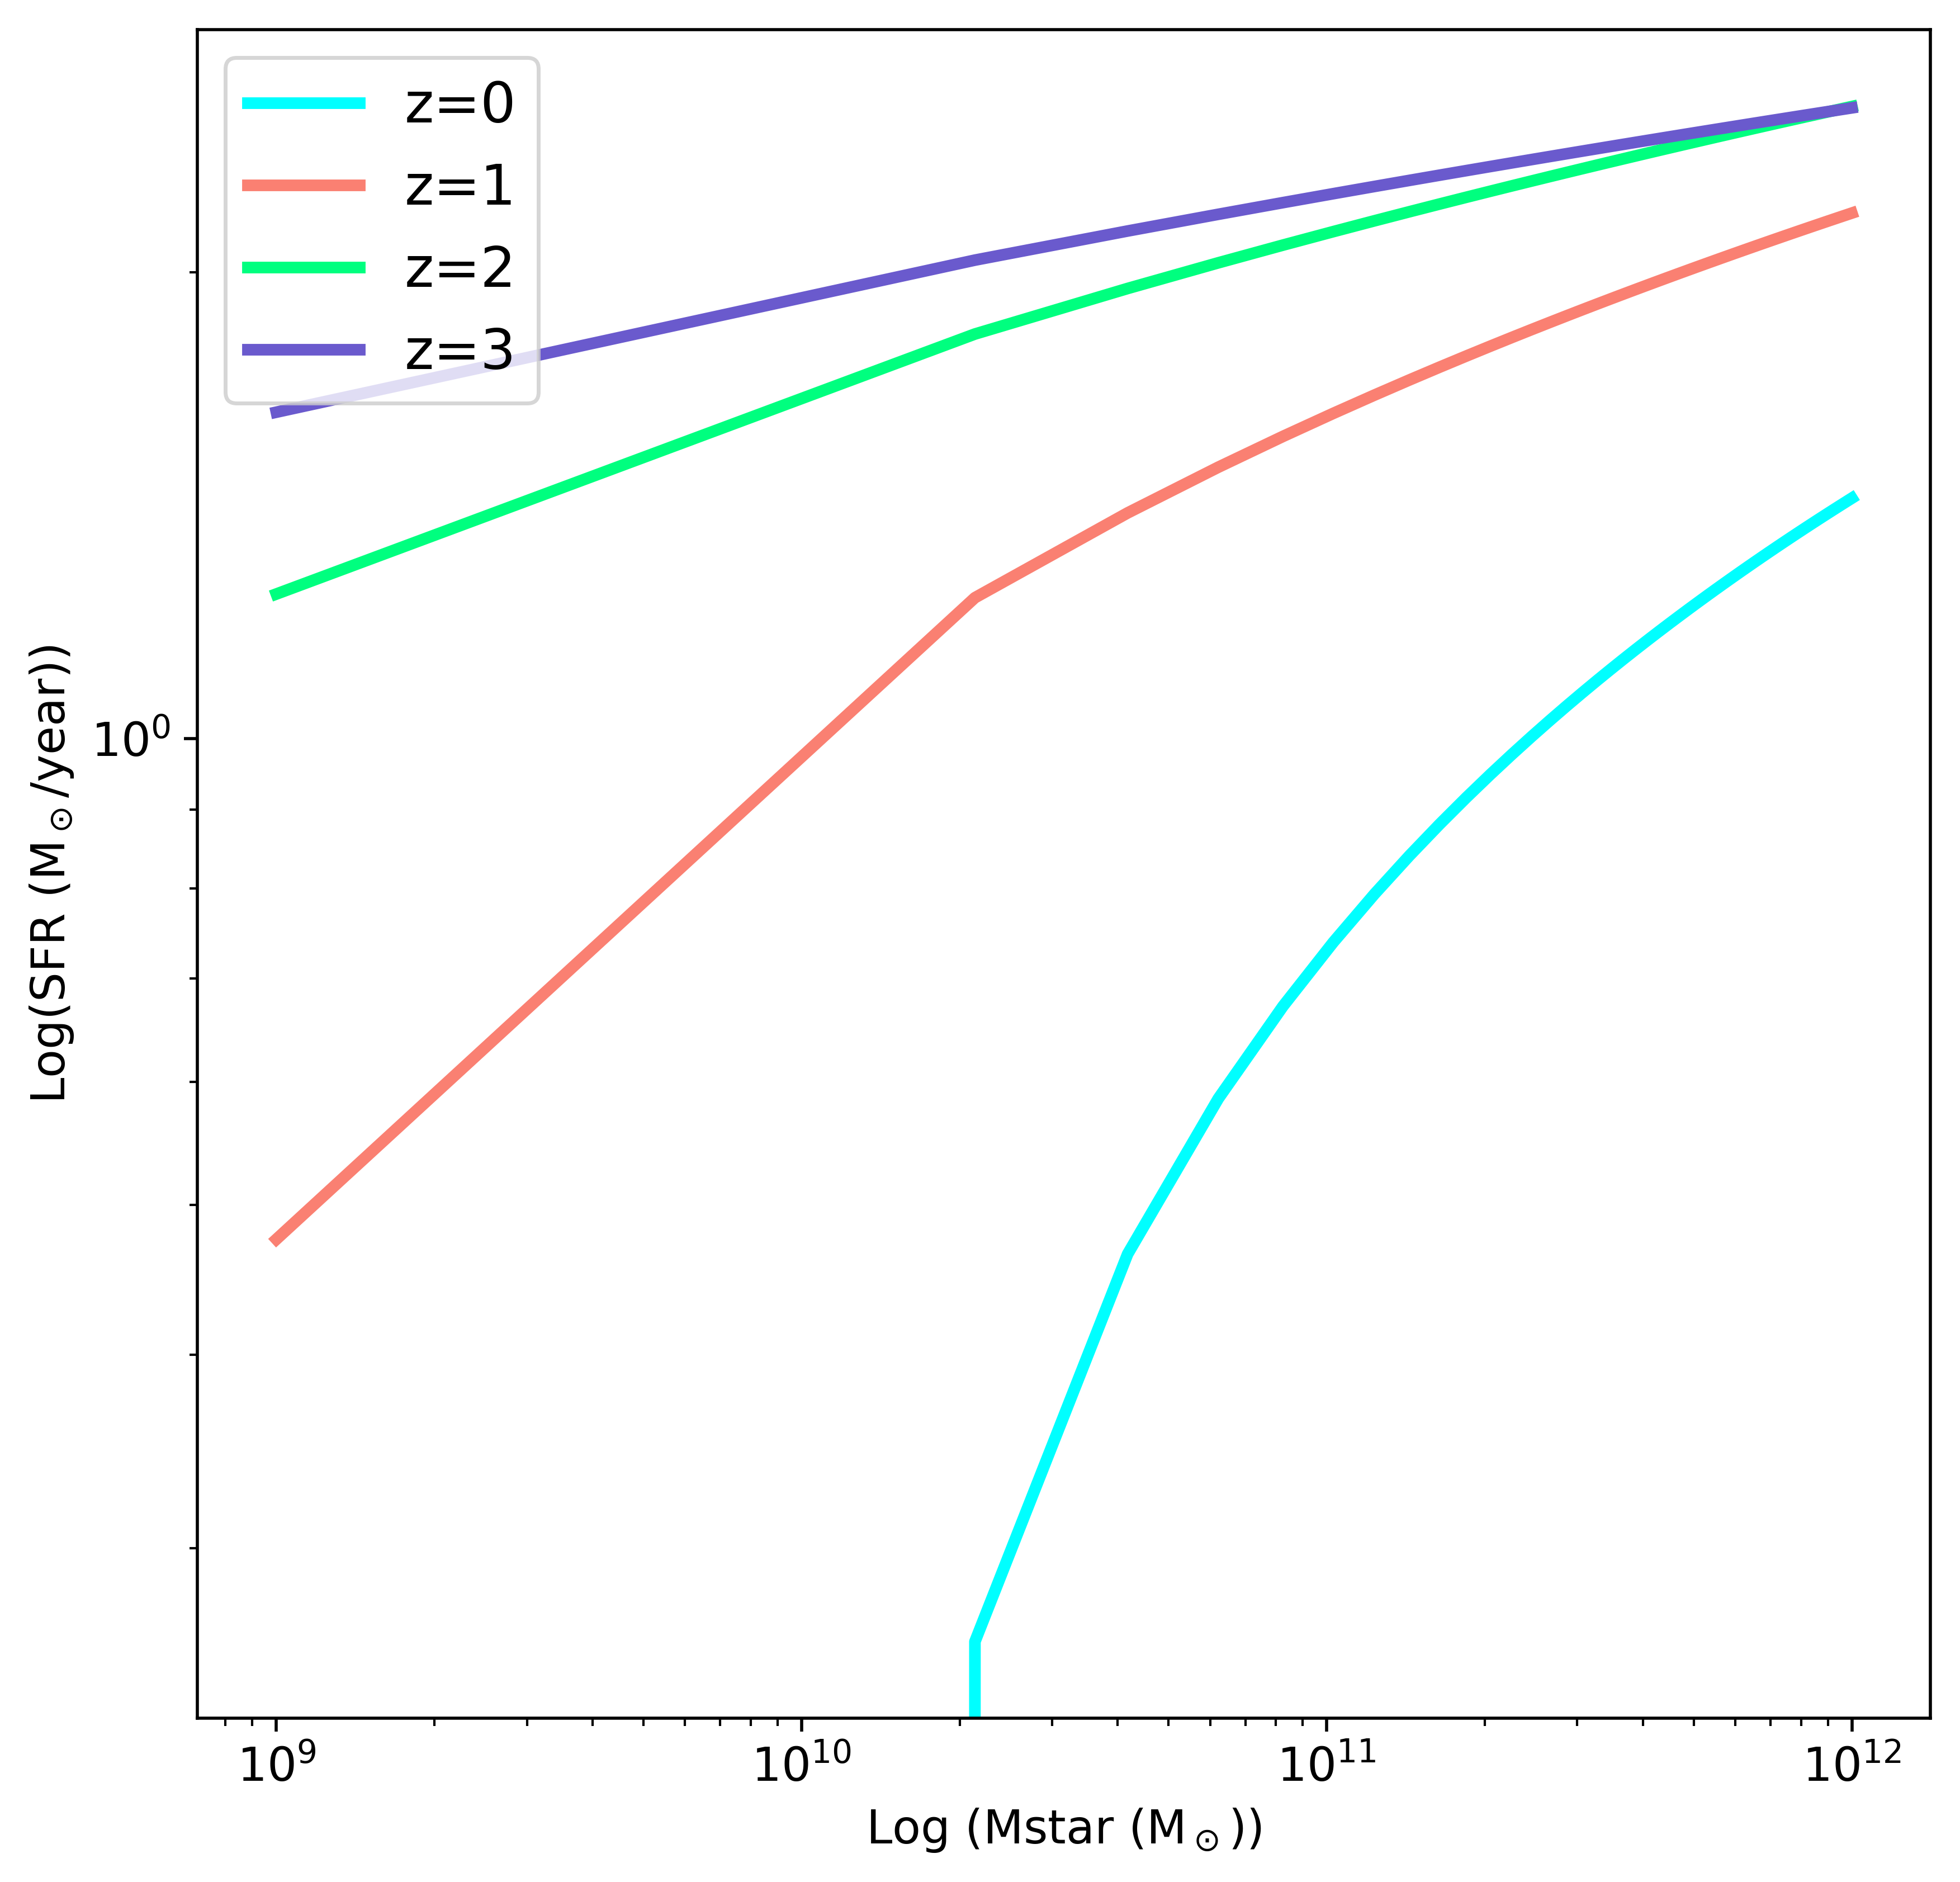

In [23]:

fig = plt.figure(figsize=(8,8), dpi=500)
ax = plt.subplot(111)

# add log log plots
plt.loglog(mass, SFRMainSequence(mass,0),color='cyan',linewidth=3,label='z=0')
plt.loglog(mass, SFRMainSequence(mass,1),color='salmon',linewidth=3,label='z=1')
plt.loglog(mass, SFRMainSequence(mass,2),color='springgreen',linewidth=3,label='z=2')
plt.loglog(mass, SFRMainSequence(mass,3),color='slateblue',linewidth=3,label='z=3')

# Add axis labels
plt.xlabel('Log (Mstar (M$_\odot$))', fontsize=12)
plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


#adjust tick label font size
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left',fontsize='x-large')


# Part C  Starbursts

What are the star formation rates for :

LIRG: $10^{11}$ L$_\odot$

ULIRG: $10^{12} $ L$_\odot$

HLIRG: $10^{13} $ L$_\odot$

In [26]:
# normal galaxies Lir = 10^10 Lsun

TIR_Normal = 1e10*Lsunergs
10**StarFormationRate(TIR_Normal,'TIR')

1.4892648150381245

In [27]:
# LIRGs  
TIR_LIRG = 1e11*Lsunergs
10**StarFormationRate(TIR_LIRG,'TIR')


14.892648150381245

In [28]:
# ULIRGs
TIR_ULIRG = 1e12*Lsunergs
10**StarFormationRate(TIR_ULIRG,'TIR')

148.92648150381245

In [29]:
# HLIRGs
TIR_ULIRG = 1e13*Lsunergs
10**StarFormationRate(TIR_ULIRG,'TIR')

1489.2648150381244